In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset=pd.read_csv("student_dataset.csv")
dataset.describe()

,Grades,Attendance,Study Hours
count,400.00000,400.000000,400.000000
mean,69.39000,0.786725,4.935000
std,15.50755,0.092436,2.117069
min,40.00000,0.600000,1.000000
25%,59.75000,0.720000,3.000000
50%,70.00000,0.790000,5.000000
75%,79.25000,0.840000,7.000000
max,99.00000,0.990000,9.000000


In [36]:
dataset.info

<bound method DataFrame.info of      Grades  Attendance  Study Hours    Label
0        46        0.62            2     Weak
1        59        0.71            3     Weak
2        54        0.67            3     Weak
3        50        0.62            3     Weak
4        47        0.60            4     Weak
..      ...         ...          ...      ...
395      78        0.75            3  Average
396      74        0.75            5  Average
397      64        0.77            4  Average
398      69        0.84            6  Average
399      66        0.83            7  Average

[400 rows x 4 columns]>

In [37]:
X=dataset.iloc[:, [0,1,2]].values
y=dataset.iloc[:, 3].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
X



array([[46.  ,  0.62,  2.  ],
       [59.  ,  0.71,  3.  ],
       [54.  ,  0.67,  3.  ],
       ...,
       [64.  ,  0.77,  4.  ],
       [69.  ,  0.84,  6.  ],
       [66.  ,  0.83,  7.  ]])

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train



array([[-0.61980135,  0.82166748, -0.42931945],
       [-1.01277156, -0.85065439, -1.36943503],
       [ 0.29712914, -0.18172564,  0.04073834],
       [ 1.1485646 ,  1.15613185,  0.04073834],
       [-0.61980135, -0.51619002,  0.98085392],
       [ 0.36262418, -0.85065439, -0.89937724],
       [-1.2747517 , -1.74255938, -0.42931945],
       [ 0.49361425, -0.73916626,  0.98085392],
       [ 1.47603978,  0.59869123,  0.51079613],
       [-0.35782121, -0.07023752, -0.42931945],
       [-1.86420702, -1.85404751, -0.89937724],
       [-1.34024674, -0.96214251, -1.83949282],
       [ 0.42811921,  0.15273873,  0.04073834],
       [-0.94727653, -0.29321377, -0.89937724],
       [-0.09584107, -0.62767814, -0.89937724],
       [ 0.035149  ,  0.59869123, -0.89937724],
       [-0.09584107,  0.26422685,  0.51079613],
       [-0.81628646, -1.51958313, -0.42931945],
       [-0.48881128, -0.73916626, -0.89937724],
       [-0.1613361 , -0.18172564,  0.04073834],
       [-1.53673184, -2.07702375, -0.429

In [39]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0,solver='lbfgs',multi_class='auto')
classifier.fit(X_train,y_train)

test_accuracy=classifier.score(X_test,y_test)
print("Test Accuracy:",test_accuracy)



Test Accuracy: 1.0


In [40]:
y_pred=classifier.predict(X_test)
probs_y=classifier.predict_proba(X_test)
probs_y=np.round(probs_y,2)
res="{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test","y_pred","Grades","Attendance","Study Hours\n")
res+="-"*65+"\n"
res+="\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x,y,a,b,c in zip(y_test,y_pred,probs_y[:,0],probs_y[:,1],probs_y[:,2]))
print(res)




y_test     | y_pred     | Grades     | Attendance    | Study Hours
-----------------------------------------------------------------
Advanced   | Advanced   | 0.53       | 0.47          | 0.0       
Average    | Average    | 0.09       | 0.91          | 0.0       
Average    | Average    | 0.08       | 0.92          | 0.0       
Advanced   | Advanced   | 1.0        | 0.0           | 0.0       
Average    | Average    | 0.1        | 0.89          | 0.0       
Weak       | Weak       | 0.0        | 0.0           | 1.0       
Advanced   | Advanced   | 0.86       | 0.14          | 0.0       
Average    | Average    | 0.0        | 0.58          | 0.42      
Advanced   | Advanced   | 0.96       | 0.04          | 0.0       
Average    | Average    | 0.01       | 0.98          | 0.01      
Weak       | Weak       | 0.0        | 0.08          | 0.92      
Advanced   | Advanced   | 1.0        | 0.0           | 0.0       
Advanced   | Advanced   | 0.86       | 0.14          | 0.0       
Average  

In [41]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)



[[28  0  0]
 [ 0 45  0]
 [ 0  0 27]]


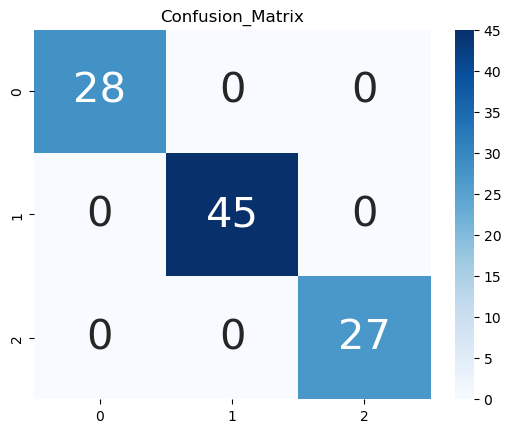

In [42]:
import seaborn as sns
import pandas as pd
ax=plt.axes()
df_cm=cm
sns.heatmap(df_cm,annot=True,annot_kws={"size":30},fmt='d',cmap="Blues",ax=ax)
ax.set_title('Confusion_Matrix')
plt.show()

In [43]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Instantiate the logistic regression model
model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto')

# Instantiate the K-Fold cross-validator with k=5
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=kf)

# Print the cross-validated scores
print("Cross-Validated Scores:", cv_scores)

# Calculate and print the mean score
mean_score = cv_scores.mean()
print("Mean Score:", mean_score)


Cross-Validated Scores: [0.96666667 0.98333333 0.95       0.96666667 0.96666667]
Mean Score: 0.9666666666666666
